BIDV

In [1]:
#. Import thư viện cần thiết
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Đọc file và tiền xử lí dữ liệu
df = pd.read_csv('../data/BIDV.csv')
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)


In [3]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2024,53500.0,53300.0,54300.0,52400.0,1250000,0.0094
1,02/29/2024,53000.0,53900.0,54000.0,53000.0,1340000,-0.0167
2,02/28/2024,53900.0,53200.0,54800.0,52300.0,2340000,0.0170
3,02/27/2024,53000.0,53700.0,54000.0,53000.0,1740000,-0.0112
4,02/26/2024,53600.0,52800.0,54500.0,52000.0,1530000,0.0308
...,...,...,...,...,...,...,...
1247,03/07/2019,26710.5,26787.0,26978.3,26557.4,2140000,0.0043
1248,03/06/2019,26595.7,26480.9,26710.5,26327.8,2009999,0.0043
1249,03/05/2019,26480.9,25409.4,27016.6,25409.4,5300000,0.0298
1250,03/04/2019,25715.5,25332.9,25830.3,25256.3,1150000,0.0228


In [4]:
df1=df.reset_index()['Price']

In [5]:
#. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
#. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [7]:
#. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [9]:
# . Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [10]:
# . Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# . Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1126
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0086
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0060
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0056
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0037
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0035
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0027
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0021
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0020
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0015
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0014
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0013
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0012
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0011
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0011
E

In [12]:
# . Dự báo dữ liệu test

y_pred=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [13]:
# . Chuẩn hóa dữ liệu y_pred

y_pred=scaler.inverse_transform(y_pred)

In [14]:
# Chuẩn hóa dữu liệuu y_test
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [15]:
# Tính RMSE
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing RMSE:', test_rmse)

# Tính MAPE (Mean Absolute Percentage Error)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#Tinh Mae
mae = np.mean(np.abs(np.array(y_pred) - np.array(y_test)))
print('Testing Mae:', mae)

Testing RMSE: 805.72994619878
Testing MAPE: 2.042094503025286
Testing Mae: 611.5990621083959


In [16]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.09838451]
101
1 day input [0.09667164 0.11675661 0.12931218 0.10797067 0.10294779 0.09918144
 0.09918144 0.06779416 0.07030725 0.07156051 0.04519611 0.05021899
 0.04896245 0.05524188 0.05524188 0.03766342 0.03641016 0.04394285
 0.02762094 0.03515362 0.04770919 0.03766342 0.05021899 0.04770919
 0.05147553 0.03515362 0.03515362 0.03766342 0.03891997 0.02259805
 0.02259805 0.03264054 0.02762094 0.02762094 0.01757517 0.02008825
 0.03515362 0.         0.02259805 0.03013074 0.03515362 0.04268631
 0.05021899 0.04770919 0.07030725 0.06528436 0.06151802 0.05272879
 0.03891997 0.05021899 0.05775168 0.04519611 0.05272879 0.03515362
 0.01255557 0.04394285 0.06277456 0.06277456 0.09039222 0.0979249
 0.10545759 0.0979249  0.10043798 0.09039222 0.09039222 0.10671413
 0.10545759 0.10545759 0.12303604 0.10420433 0.11424681 0.11550335
 0.12931218 0.12303604 0.11173701 0.11801316 0.12805892 0.10545759
 0.12303604 0.13056872 0.12554584 0.10797067 0.0929053  0.0979249
 0.11299027 0.10545759 0.13810141 0

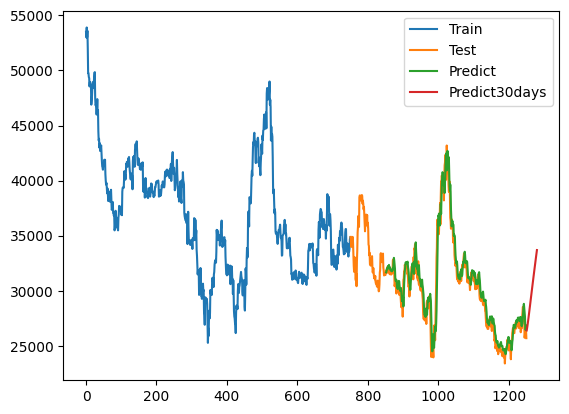

In [17]:
# 14.Vẽ hình du doan 30 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [18]:
# Dự báo 60 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

[0.09838451]
101
1 day input [0.09667164 0.11675661 0.12931218 0.10797067 0.10294779 0.09918144
 0.09918144 0.06779416 0.07030725 0.07156051 0.04519611 0.05021899
 0.04896245 0.05524188 0.05524188 0.03766342 0.03641016 0.04394285
 0.02762094 0.03515362 0.04770919 0.03766342 0.05021899 0.04770919
 0.05147553 0.03515362 0.03515362 0.03766342 0.03891997 0.02259805
 0.02259805 0.03264054 0.02762094 0.02762094 0.01757517 0.02008825
 0.03515362 0.         0.02259805 0.03013074 0.03515362 0.04268631
 0.05021899 0.04770919 0.07030725 0.06528436 0.06151802 0.05272879
 0.03891997 0.05021899 0.05775168 0.04519611 0.05272879 0.03515362
 0.01255557 0.04394285 0.06277456 0.06277456 0.09039222 0.0979249
 0.10545759 0.0979249  0.10043798 0.09039222 0.09039222 0.10671413
 0.10545759 0.10545759 0.12303604 0.10420433 0.11424681 0.11550335
 0.12931218 0.12303604 0.11173701 0.11801316 0.12805892 0.10545759
 0.12303604 0.13056872 0.12554584 0.10797067 0.0929053  0.0979249
 0.11299027 0.10545759 0.13810141 0

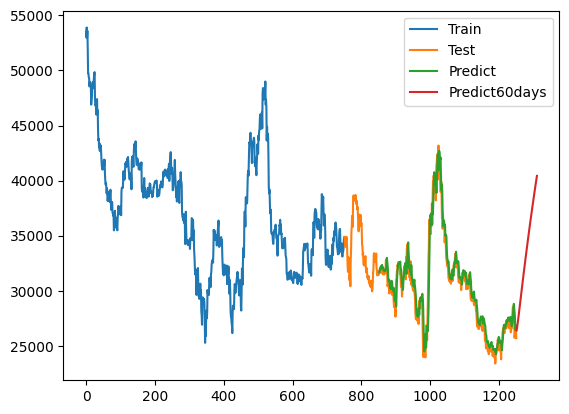

In [19]:
#Vẽ hình du doan 60 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_60 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))

plt.legend(['Train','Test','Predict','Predict60days'])
plt.show()

In [20]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1


[0.09838451]
101
1 day input [0.09667164 0.11675661 0.12931218 0.10797067 0.10294779 0.09918144
 0.09918144 0.06779416 0.07030725 0.07156051 0.04519611 0.05021899
 0.04896245 0.05524188 0.05524188 0.03766342 0.03641016 0.04394285
 0.02762094 0.03515362 0.04770919 0.03766342 0.05021899 0.04770919
 0.05147553 0.03515362 0.03515362 0.03766342 0.03891997 0.02259805
 0.02259805 0.03264054 0.02762094 0.02762094 0.01757517 0.02008825
 0.03515362 0.         0.02259805 0.03013074 0.03515362 0.04268631
 0.05021899 0.04770919 0.07030725 0.06528436 0.06151802 0.05272879
 0.03891997 0.05021899 0.05775168 0.04519611 0.05272879 0.03515362
 0.01255557 0.04394285 0.06277456 0.06277456 0.09039222 0.0979249
 0.10545759 0.0979249  0.10043798 0.09039222 0.09039222 0.10671413
 0.10545759 0.10545759 0.12303604 0.10420433 0.11424681 0.11550335
 0.12931218 0.12303604 0.11173701 0.11801316 0.12805892 0.10545759
 0.12303604 0.13056872 0.12554584 0.10797067 0.0929053  0.0979249
 0.11299027 0.10545759 0.13810141 0

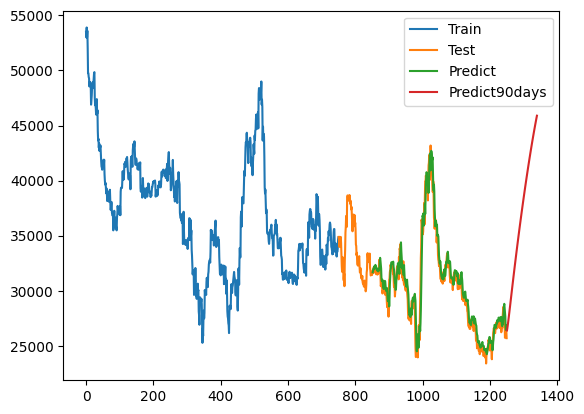

In [21]:
# 14.Vẽ hình 90 ngay 

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_90 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict90days'])
plt.show()

VIB


In [22]:
# Đọc file và tiền xử lí dữ liệu
df = pd.read_csv('../data/VIB.csv')
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

In [23]:
df1=df.reset_index()['Price']

In [24]:
#. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [25]:
#. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [26]:
#. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
#. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [28]:
# . Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [29]:
# . Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# . Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2134
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0114
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0086
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0061
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0034
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0033
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0026
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0023
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0018
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0016
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0014
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0013
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0010    
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 

In [31]:
# . Dự báo dữ liệu test

y_pred=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [32]:
# . Chuẩn hóa dữ liệu y_pred
y_pred=scaler.inverse_transform(y_pred)

In [33]:
# Chuẩn hóa dữu liệuu y_test
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [34]:
# Tính RMSE
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing RMSE:', test_rmse)

# Tính MAPE (Mean Absolute Percentage Error)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#Tinh Mae
mae = np.mean(np.abs(np.array(y_pred) - np.array(y_test)))
print('Testing Mae:', mae)

Testing RMSE: 461.3555730942514
Testing MAPE: 4.302271802860953
Testing Mae: 388.14986544592256


In [35]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.19311783]
101
1 day input [0.09370148 0.09370148 0.09677616 0.09677616 0.08907425 0.09214892
 0.08907425 0.07988067 0.06913452 0.06758197 0.06758197 0.07065664
 0.07065664 0.06554233 0.06106731 0.05363938 0.05363938 0.05214771
 0.05065603 0.05363938 0.05363938 0.05513105 0.05659229 0.05659229
 0.05363938 0.05363938 0.05659229 0.05659229 0.05214771 0.05214771
 0.05513105 0.05808396 0.06255898 0.06106731 0.067034   0.06602941
 0.06602941 0.0674602  0.0674602  0.0674602  0.06892143 0.07035222
 0.07178301 0.07324424 0.07467503 0.07467503 0.07324424 0.07610582
 0.07610582 0.07610582 0.07467503 0.17930531 0.17729611 0.17324728
 0.17525648 0.17930531 0.17930531 0.1813145  0.18536333 0.19139091
 0.19139091 0.18938172 0.18737252 0.19139091 0.19139091 0.19139091
 0.19543974 0.19543974 0.19543974 0.19744893 0.19744893 0.19948857
 0.20149776 0.19948857 0.19948857 0.19543974 0.19543974 0.19543974
 0.19139091 0.19139091 0.18536333 0.1813145  0.18332369 0.19543974
 0.18938172 0.19744893 0.20149776

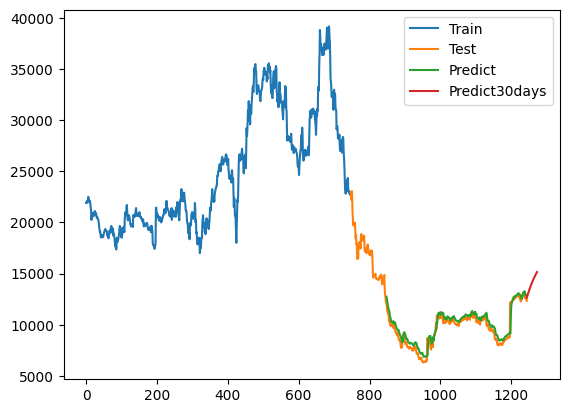

In [36]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [37]:
# Dự báo 60 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

[0.19311783]
101
1 day input [0.09370148 0.09370148 0.09677616 0.09677616 0.08907425 0.09214892
 0.08907425 0.07988067 0.06913452 0.06758197 0.06758197 0.07065664
 0.07065664 0.06554233 0.06106731 0.05363938 0.05363938 0.05214771
 0.05065603 0.05363938 0.05363938 0.05513105 0.05659229 0.05659229
 0.05363938 0.05363938 0.05659229 0.05659229 0.05214771 0.05214771
 0.05513105 0.05808396 0.06255898 0.06106731 0.067034   0.06602941
 0.06602941 0.0674602  0.0674602  0.0674602  0.06892143 0.07035222
 0.07178301 0.07324424 0.07467503 0.07467503 0.07324424 0.07610582
 0.07610582 0.07610582 0.07467503 0.17930531 0.17729611 0.17324728
 0.17525648 0.17930531 0.17930531 0.1813145  0.18536333 0.19139091
 0.19139091 0.18938172 0.18737252 0.19139091 0.19139091 0.19139091
 0.19543974 0.19543974 0.19543974 0.19744893 0.19744893 0.19948857
 0.20149776 0.19948857 0.19948857 0.19543974 0.19543974 0.19543974
 0.19139091 0.19139091 0.18536333 0.1813145  0.18332369 0.19543974
 0.18938172 0.19744893 0.20149776

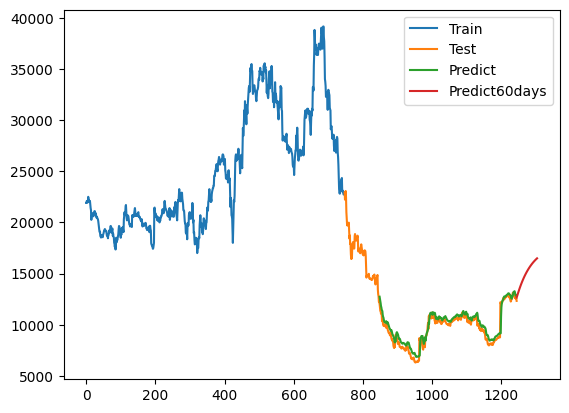

In [38]:
#Vẽ hình du doan 60 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_60 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))

plt.legend(['Train','Test','Predict','Predict60days'])
plt.show()

In [39]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

[0.19311783]
101
1 day input [0.09370148 0.09370148 0.09677616 0.09677616 0.08907425 0.09214892
 0.08907425 0.07988067 0.06913452 0.06758197 0.06758197 0.07065664
 0.07065664 0.06554233 0.06106731 0.05363938 0.05363938 0.05214771
 0.05065603 0.05363938 0.05363938 0.05513105 0.05659229 0.05659229
 0.05363938 0.05363938 0.05659229 0.05659229 0.05214771 0.05214771
 0.05513105 0.05808396 0.06255898 0.06106731 0.067034   0.06602941
 0.06602941 0.0674602  0.0674602  0.0674602  0.06892143 0.07035222
 0.07178301 0.07324424 0.07467503 0.07467503 0.07324424 0.07610582
 0.07610582 0.07610582 0.07467503 0.17930531 0.17729611 0.17324728
 0.17525648 0.17930531 0.17930531 0.1813145  0.18536333 0.19139091
 0.19139091 0.18938172 0.18737252 0.19139091 0.19139091 0.19139091
 0.19543974 0.19543974 0.19543974 0.19744893 0.19744893 0.19948857
 0.20149776 0.19948857 0.19948857 0.19543974 0.19543974 0.19543974
 0.19139091 0.19139091 0.18536333 0.1813145  0.18332369 0.19543974
 0.18938172 0.19744893 0.20149776

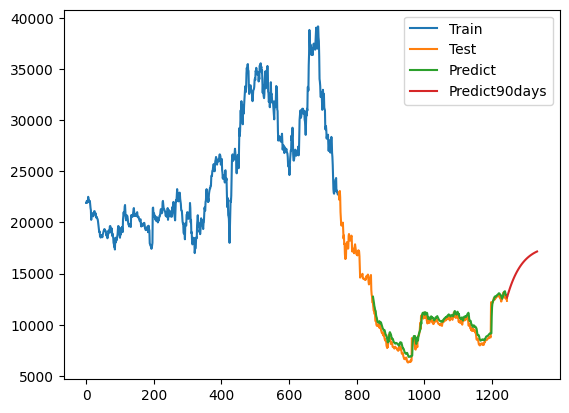

In [40]:
# 14.Vẽ hình 90 ngay 

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_90 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict90days'])
plt.show()

STB


In [41]:
# Đọc file và tiền xử lí dữ liệu
df = pd.read_csv('../data/STB.csv')
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

In [42]:
df1=df.reset_index()['Price']

In [43]:
#. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [44]:
#. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [45]:
#. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [46]:
#. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [47]:
# . Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [48]:
# . Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
# . Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.4234
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0502
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0254
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0057
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0060
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0046
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0037
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0033
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0031
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0029
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0026
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0024
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - lo

In [50]:
# . Dự báo dữ liệu test

y_pred=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [51]:
# . Chuẩn hóa dữ liệu y_pred

y_pred=scaler.inverse_transform(y_pred)

In [52]:
# Chuẩn hóa dữu liệuu y_test
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [53]:
# Tính RMSE
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing RMSE:', test_rmse)

# Tính MAPE (Mean Absolute Percentage Error)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#Tinh Mae
mae = np.mean(np.abs(np.array(y_pred) - np.array(y_test)))
print('Testing Mae:', mae)

Testing RMSE: 521.1071468915394
Testing MAPE: 4.3042727934791785
Testing Mae: 456.25744292371553


In [54]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.20052439]
101
1 day input [0.14185639 0.14711033 0.14711033 0.15411559 0.14886165 0.14886165
 0.14360771 0.14185639 0.14360771 0.14711033 0.14535902 0.14185639
 0.14360771 0.14360771 0.14535902 0.14185639 0.14535902 0.14886165
 0.14185639 0.14010508 0.14711033 0.15236427 0.15411559 0.14535902
 0.14711033 0.14010508 0.13660245 0.14535902 0.15236427 0.15061296
 0.15236427 0.15411559 0.15761821 0.1558669  0.14886165 0.15236427
 0.15061296 0.15061296 0.1558669  0.15761821 0.1558669  0.15761821
 0.15761821 0.15761821 0.16462347 0.16637478 0.16637478 0.16287215
 0.16287215 0.16462347 0.16637478 0.16112084 0.16287215 0.16462347
 0.16112084 0.16987741 0.16812609 0.16637478 0.17688266 0.16112084
 0.16287215 0.15936953 0.16637478 0.16637478 0.14886165 0.1558669
 0.1558669  0.16112084 0.16637478 0.16812609 0.16637478 0.16812609
 0.17338004 0.17338004 0.17338004 0.17513135 0.17338004 0.17162872
 0.17863398 0.17162872 0.16987741 0.17688266 0.17513135 0.17338004
 0.18388792 0.1821366  0.19264448 

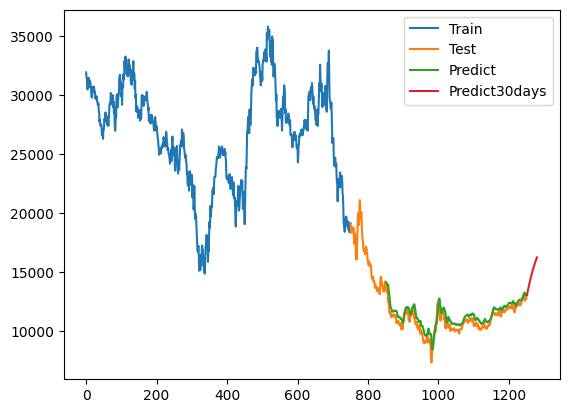

In [55]:
# 14.Vẽ hình du doan 30 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [56]:
# Dự báo 60 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

[0.20052439]
101
1 day input [0.14185639 0.14711033 0.14711033 0.15411559 0.14886165 0.14886165
 0.14360771 0.14185639 0.14360771 0.14711033 0.14535902 0.14185639
 0.14360771 0.14360771 0.14535902 0.14185639 0.14535902 0.14886165
 0.14185639 0.14010508 0.14711033 0.15236427 0.15411559 0.14535902
 0.14711033 0.14010508 0.13660245 0.14535902 0.15236427 0.15061296
 0.15236427 0.15411559 0.15761821 0.1558669  0.14886165 0.15236427
 0.15061296 0.15061296 0.1558669  0.15761821 0.1558669  0.15761821
 0.15761821 0.15761821 0.16462347 0.16637478 0.16637478 0.16287215
 0.16287215 0.16462347 0.16637478 0.16112084 0.16287215 0.16462347
 0.16112084 0.16987741 0.16812609 0.16637478 0.17688266 0.16112084
 0.16287215 0.15936953 0.16637478 0.16637478 0.14886165 0.1558669
 0.1558669  0.16112084 0.16637478 0.16812609 0.16637478 0.16812609
 0.17338004 0.17338004 0.17338004 0.17513135 0.17338004 0.17162872
 0.17863398 0.17162872 0.16987741 0.17688266 0.17513135 0.17338004
 0.18388792 0.1821366  0.19264448 

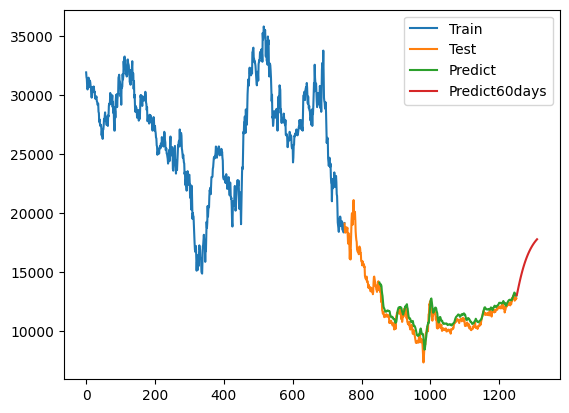

In [57]:
#Vẽ hình du doan 60 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_60 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))

plt.legend(['Train','Test','Predict','Predict60days'])
plt.show()

In [58]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

[0.20052439]
101
1 day input [0.14185639 0.14711033 0.14711033 0.15411559 0.14886165 0.14886165
 0.14360771 0.14185639 0.14360771 0.14711033 0.14535902 0.14185639
 0.14360771 0.14360771 0.14535902 0.14185639 0.14535902 0.14886165
 0.14185639 0.14010508 0.14711033 0.15236427 0.15411559 0.14535902
 0.14711033 0.14010508 0.13660245 0.14535902 0.15236427 0.15061296
 0.15236427 0.15411559 0.15761821 0.1558669  0.14886165 0.15236427
 0.15061296 0.15061296 0.1558669  0.15761821 0.1558669  0.15761821
 0.15761821 0.15761821 0.16462347 0.16637478 0.16637478 0.16287215
 0.16287215 0.16462347 0.16637478 0.16112084 0.16287215 0.16462347
 0.16112084 0.16987741 0.16812609 0.16637478 0.17688266 0.16112084
 0.16287215 0.15936953 0.16637478 0.16637478 0.14886165 0.1558669
 0.1558669  0.16112084 0.16637478 0.16812609 0.16637478 0.16812609
 0.17338004 0.17338004 0.17338004 0.17513135 0.17338004 0.17162872
 0.17863398 0.17162872 0.16987741 0.17688266 0.17513135 0.17338004
 0.18388792 0.1821366  0.19264448 

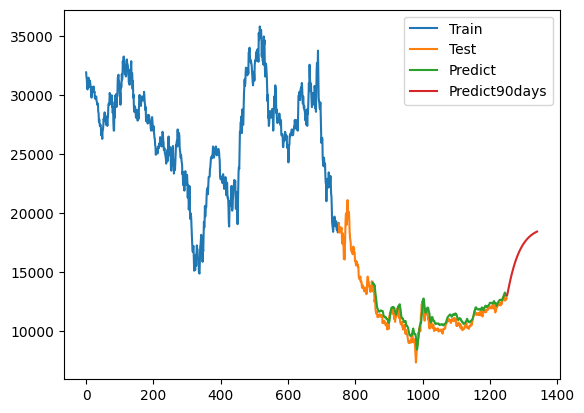

In [59]:
# 14.Vẽ hình 90 ngay 

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_90 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict90days'])
plt.show()